In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

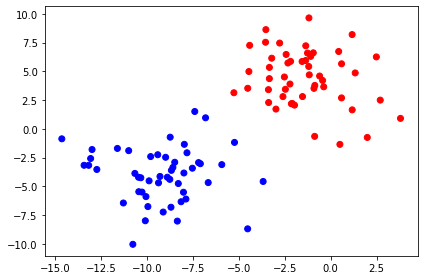

In [2]:
x,y=make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=2.5,random_state=1)

colormap=np.array(['r','b'])

plt.scatter(x[:,0],x[:,1],c=colormap[y])

plt.tight_layout()

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

sc=StandardScaler()

sc.fit(x_train)

x_train_std=sc.transform(x_train)

x_test_std=sc.transform(x_test)

In [4]:
svm=SVC(kernel='linear',C=1,random_state=1)

svm.fit(x_train_std,y_train)

y_pred=svm.predict(x_test_std)

print('Missclassification error: ',(y_test!=y_pred).sum())

Missclassification error:  0


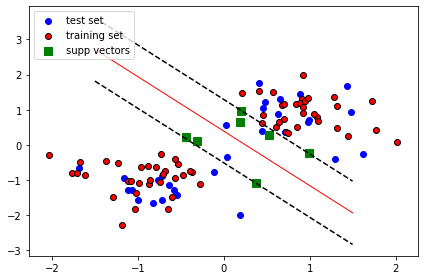

In [5]:
w=svm.coef_[0]

a=-w[0]/w[1]

xx=np.linspace(-1.5,1.5)

yy=a*xx-(svm.intercept_[0])/w[1]

plt.scatter(x_test_std[:,0],x_test_std[:,1],c=colormap[y_test[0]], label='test set')

plt.scatter(x_train_std[:,0],x_train_std[:,1],c=colormap[y_train[0]],edgecolors="black", label='training set')

plt.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1],s=70,linewidth=1, marker=',',
    
    facecolors="green",label='supp vectors')
    
    #edgecolors="black")

plt.plot(xx,yy,"k-",linewidth=1,color='red')

plt.legend(loc='upper left')

plt.tight_layout()

# margin=1/np.sqrt(np.sum(svm.coef_**2))
# yy-np.sqrt(1+a**2)*margin
# yy+np.sqrt(1+a**2)*margin

yy_down=a*xx+(-1-svm.intercept_[0])/w[1]

yy_up=a*xx+(1-svm.intercept_[0])/w[1]

plt.plot(xx,yy_down,'k--')

plt.plot(xx,yy_up,'k--')